In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [16]:
import opendatasets as od
 
od.download(
    "https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction")

100%|████████████████████████████████████████████████████████████████| 262k/262k [00:01<00:00, 250kB/s]

In [38]:
df = pd.read_csv("credit-card-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [40]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [41]:
df.duplicated().sum()

0

In [42]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [43]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [48]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)


KeyError: "['RowNumber', 'CustomerId', 'Surname'] not found in axis"

In [49]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<AxesSubplot:ylabel='Frequency'>

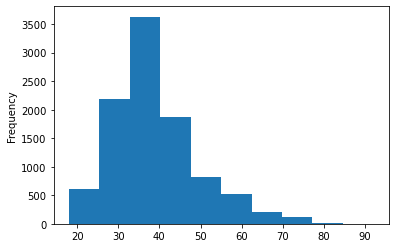

In [66]:
df['Age'].plot(kind='hist')

<AxesSubplot:xlabel='Gender', ylabel='count'>

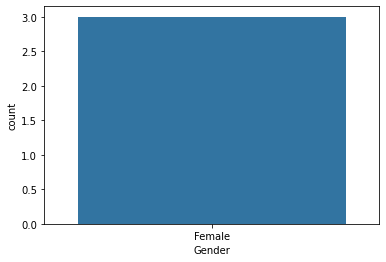

In [34]:
sns.countplot(x=df['Gender'])

In [45]:
df.groupby('Gender').mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,,
Female,4942.929562,1.569115e+07,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,5048.427891,1.569077e+07,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [68]:
df = pd.get_dummies(df,columns=["Gender",'Geography'],drop_first=True)

In [69]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [71]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [76]:
print(x_train.shape)
print(x_test.shape)

(7000, 11)
(3000, 11)


In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [83]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [84]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [108]:
history = model.fit(x_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
175/175 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.8161 - val_loss: 0.4182 - val_accuracy: 0.8250
Epoch 2/10
175/175 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8164 - val_loss: 0.4179 - val_accuracy: 0.8250
Epoch 3/10
175/175 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8161 - val_loss: 0.4176 - val_accuracy: 0.8250
Epoch 4/10
175/175 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8170 - val_loss: 0.4172 - val_accuracy: 0.8250
Epoch 5/10
175/175 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8173 - val_loss: 0.4169 - val_accuracy: 0.8250
Epoch 6/10
175/175 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8179 - val_loss: 0.4166 - val_accuracy: 0.8257
Epoch 7/10
175/175 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8184 - val_loss: 0.4163 - val_accuracy: 0.8264
Epoch 

In [109]:
# for first layer we got weights and biases
model.layers[0].get_weights()

[array([[-0.08467088,  0.09560712,  0.09800496],
        [ 2.6250644 , -0.27116543, -2.2101624 ],
        [ 0.06680585,  0.23868628,  0.05165858],
        [ 0.06076596, -0.8910266 ,  0.12300571],
        [ 0.17710601, -0.46974736,  0.7763022 ],
        [-0.1783723 , -0.12985286,  0.04473488],
        [-0.10029358,  1.7340435 ,  0.11288449],
        [-0.12877464, -0.15995908,  0.03952971],
        [-0.29095984,  0.4086279 ,  0.5242078 ],
        [ 0.38290098, -0.61762536, -0.5054675 ],
        [-0.05193608, -0.08089958, -0.18273984]], dtype=float32),
 array([-0.29973632,  0.89725953,  0.6132222 ], dtype=float32)]

In [110]:
# for second layer we get weights and biases
model.layers[0].get_weights()

[array([[-0.08467088,  0.09560712,  0.09800496],
        [ 2.6250644 , -0.27116543, -2.2101624 ],
        [ 0.06680585,  0.23868628,  0.05165858],
        [ 0.06076596, -0.8910266 ,  0.12300571],
        [ 0.17710601, -0.46974736,  0.7763022 ],
        [-0.1783723 , -0.12985286,  0.04473488],
        [-0.10029358,  1.7340435 ,  0.11288449],
        [-0.12877464, -0.15995908,  0.03952971],
        [-0.29095984,  0.4086279 ,  0.5242078 ],
        [ 0.38290098, -0.61762536, -0.5054675 ],
        [-0.05193608, -0.08089958, -0.18273984]], dtype=float32),
 array([-0.29973632,  0.89725953,  0.6132222 ], dtype=float32)]

In [111]:
# now it's time or prediction
# we do it by
model.predict(x_test_scaled)

94/94 [==============================] - 0s 1ms/step


array([[0.17578273],
       [0.03809419],
       [0.16901816],
       ...,
       [0.0387176 ],
       [0.03809994],
       [0.4120631 ]], dtype=float32)

In [112]:
# here we have to give threshold to determine which values will be 1 or 0
# so what we do is 
y_log=model.predict(x_test_scaled)
y_pred = np.where(y_log>0.5,1,0)


94/94 [==============================] - 0s 1ms/step


In [113]:
from sklearn.metrics import accuracy_score

In [114]:
score=accuracy_score(y_test,y_pred)
print(score)

0.8053333333333333


In [119]:
import matplotlib.pyplot as plt

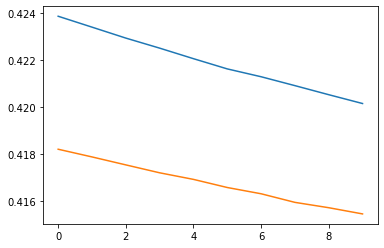

In [126]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

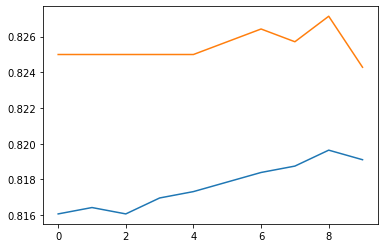

In [123]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])